#### Heart Disease Predictor:

##### 1.Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

##### 2. Data Cleaning:

In [4]:
heart_data = pd.read_csv("Data source/health_data.csv")

In [5]:
heart_data.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [6]:
# Drop column: 'Unnamed: 0'
heart_data = heart_data.drop(columns=['Unnamed: 0',"id"])

In [7]:
heart_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
heart_data.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,19240.0,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,22601.0,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,19066.0,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,22431.0,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1
69999,20540.0,0,170.0,72.0,120.0,80.0,1,0,0,0,1,0


In [9]:
# To check for value type
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  float64
 5   ap_lo        70000 non-null  float64
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.4 MB


In [10]:
# To check for null values 
heart_data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# checking for null values
heart_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
heart_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
heart_data['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

##### 3.Data Preprocessing :

In [14]:
# using numpy, we just convert age (in days) to (in years)
heart_data["age"] = np.array(heart_data["age"])/365.25

In [15]:
# here, we just converted days to years
heart_data["age"]

0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age, Length: 70000, dtype: float64

##### 4. Plotting the other Variables:

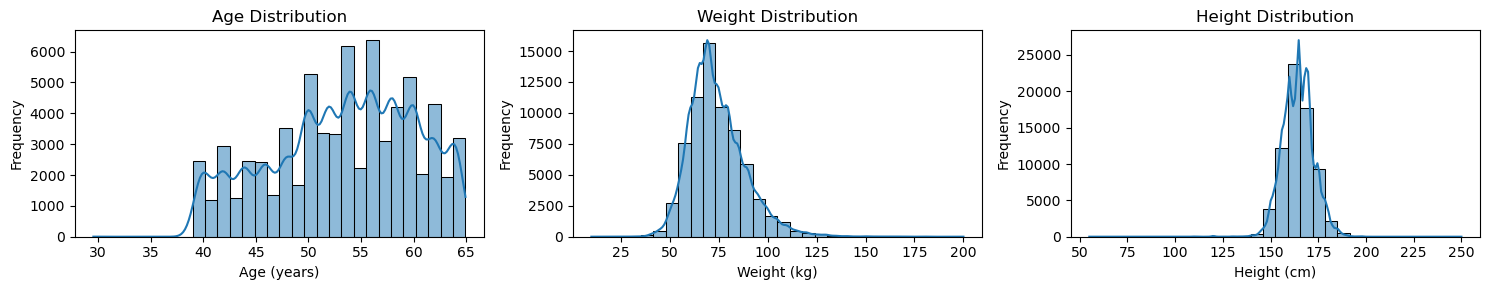

In [16]:
# Create a figure with 1 row and 3 columns for side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Plot age distribution
sns.histplot(heart_data['age'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age (years)')
axs[0].set_ylabel('Frequency')

# Plot weight distribution
sns.histplot(heart_data['weight'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Weight Distribution')
axs[1].set_xlabel('Weight (kg)')
axs[1].set_ylabel('Frequency')

# Plot height distribution
sns.histplot(heart_data['height'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Height Distribution')
axs[2].set_xlabel('Height (cm)')
axs[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

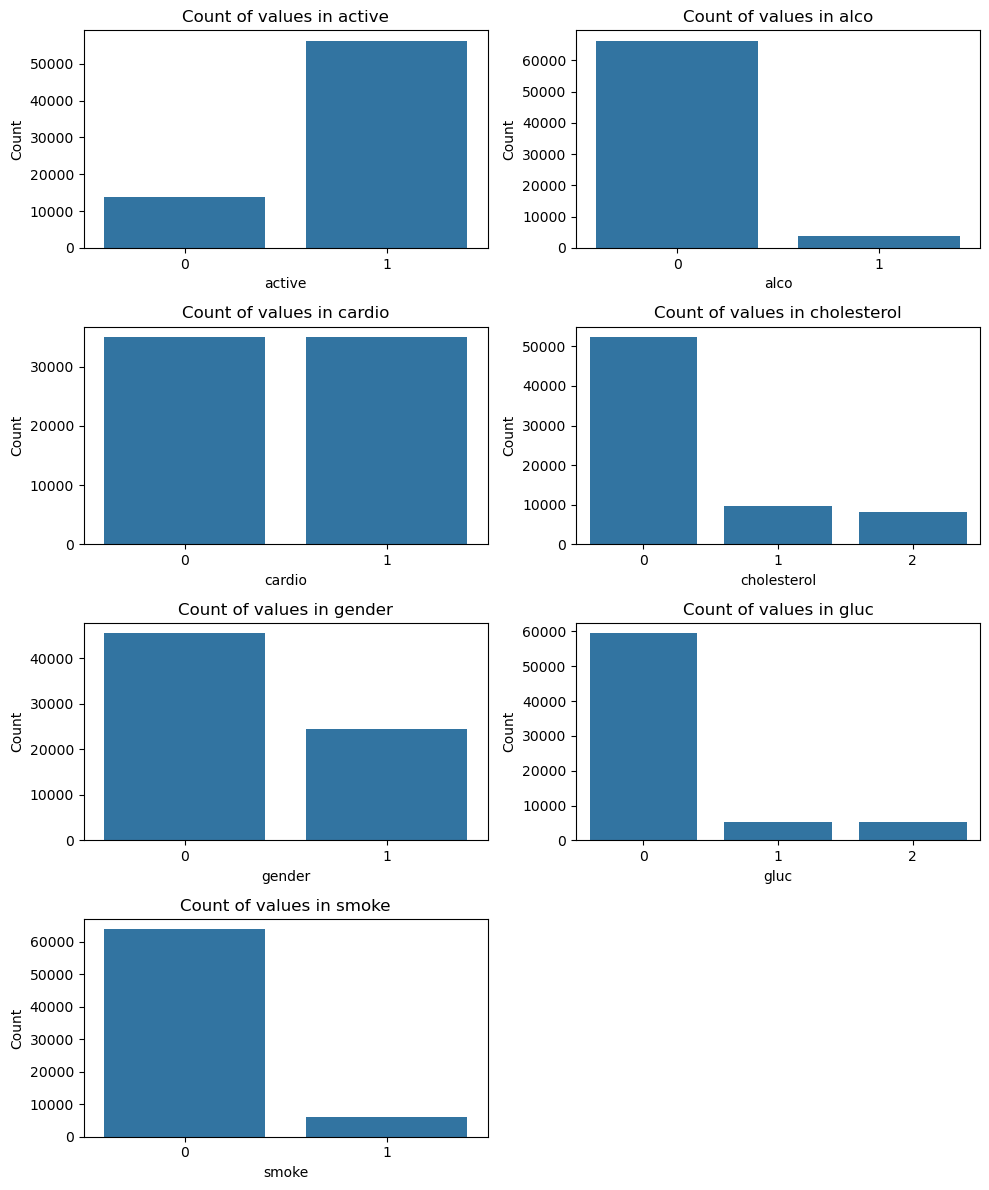

In [17]:
# Exclude specific columns
columns_to_plot = heart_data.columns.difference(['age', 'weight', 'ap_lo', 'ap_hi', 'height'])

# Number of columns to plot
num_columns = len(columns_to_plot)

# Create subplots
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(10, 3*((num_columns + 1) // 2)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot bar plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=heart_data, x=column, ax=axes[i])
    axes[i].set_title(f'Count of values in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

##### 5. Data for Model Building:


In [18]:
x = heart_data.drop(columns="cardio")
y = heart_data["cardio"]

In [19]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.357290,1,168.0,62.0,110.0,80.0,0,0,0,0,1
1,55.381246,0,156.0,85.0,140.0,90.0,2,0,0,0,1
2,51.627652,0,165.0,64.0,130.0,70.0,2,0,0,0,0
3,48.249144,1,169.0,82.0,150.0,100.0,0,0,0,0,1
4,47.841205,0,156.0,56.0,100.0,60.0,0,0,0,0,0


In [20]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

##### Here we split the data to 70-30 Ratio

In [21]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(49000, 11) (21000, 11)
(49000,) (21000,)


In [23]:
# Check for NaN values in X_train and y_train
print(X_train.isna().sum())  # For features
print(y_train.isna().sum())  # For target variable

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64
0


In [24]:
# checking for nan values
print(X_test.isna().sum())  
print(y_test.isna().sum()) 

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64
0


In [25]:
reg_model = linear_model.LinearRegression()

In [26]:
#Fitting the Multiple Linear Regression model
reg_model.fit(X_train,y_train)

LinearRegression()

In [27]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(x, reg_model.coef_))

Intercept:  -0.31952183755823116


[('age', 0.014663735024910857),
 ('gender', 0.021047681767963382),
 ('height', -0.0023858031340966796),
 ('weight', 0.00519661653104881),
 ('ap_hi', 0.00012125745823141701),
 ('ap_lo', 0.0001155320533774747),
 ('cholesterol', 0.1338592001239954),
 ('gluc', -0.024955186307122665),
 ('smoke', -0.021642008666734318),
 ('alco', -0.038768602516402025),
 ('active', -0.03750741958894385)]

In [28]:
#Predicting the Test and Train set result 
y_pred = np.ceil(reg_model.predict(X_test)) 
x_pred = np.ceil(reg_model.predict(X_train))

In [29]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1. 1. 1. ... 1. 1. 1.]


In [30]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
46730,1,1.0
48393,1,1.0
41416,1,1.0
34506,1,1.0
43725,0,1.0
...,...,...
1216,1,1.0
19036,0,1.0
51256,0,1.0
48198,1,1.0


In [31]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.5023333333333333
Mean Square Error: 0.5038571428571429
Root Mean Square Error: 0.7098289532395413


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
reg_model_2 = LogisticRegression(max_iter=1000)

In [34]:
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict on test and train sets
y_pred_test = log_reg_model.predict(X_test)
y_pred_train = log_reg_model.predict(X_train)


In [35]:
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.2796190476190476
Mean Square Error: 0.2796190476190476
Root Mean Square Error: 0.5287901735273147


In [37]:
# Initialize Logistic Regression model with class weights
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict on the test and train sets
y_pred_test = log_reg_model.predict(X_test)
y_pred_train = log_reg_model.predict(X_train)

# Evaluate performance
print(f"Accuracy on Test set: {accuracy_score(y_test, y_pred_test):.4f}")
print(f"Accuracy on Train set: {accuracy_score(y_train, y_pred_train):.4f}")

Accuracy on Test set: 0.7199
Accuracy on Train set: 0.7171
